In [9]:
import uproot
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import pandas as pd
import awkward as ak

In [62]:
def read_data(path):
    tree = uproot.open(path)['LHEF']
    print('there are {0} numebr of events'.format(tree.num_entries))
    Particles = sm_wzg_tree.arrays(filter_name='Particle*')
    
    Photon_mask   = (Particles['Particle.PID'] == 22)
    Photon = ak.zip({
    "PT" :    Particles['Particle.PT'][Photon_mask],
    "Eta":    Particles['Particle.Eta'][Photon_mask],
    "Phi":    Particles['Particle.Phi'][Photon_mask],
    "E" :    Particles['Particle.E'][Photon_mask],
    "Px" : Particles['Particle.Px'][Photon_mask],
    "Py" : Particles['Particle.Py'][Photon_mask],  
    "Pz" : Particles['Particle.Pz'][Photon_mask],  
    })
    
    return Photon
    
    

In [65]:
sm_wzg_Photon = read_data('WZAToLNuLLA_LO_loopsm/unweighted_events.root')
qckmFM0_wzg_Photon = read_data('WZAToLNuLLA_LO_QCKM_FM0/unweighted_events.root')

there are 1000 numebr of events
there are 1000 numebr of events


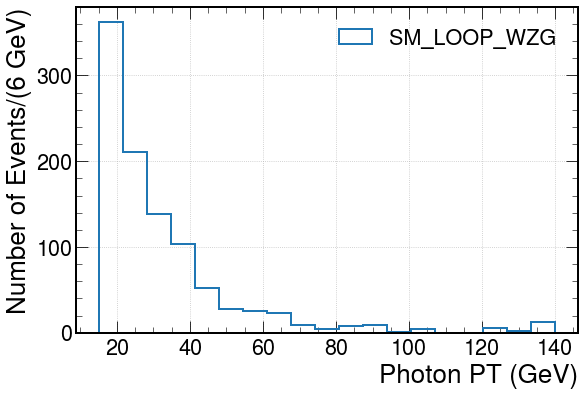

In [67]:
plt.figure(figsize=(9,6)) #
plt.style.use(hep.style.ROOT)


bins = np.linspace(15,140,20)
binwidth = (140-15)/20


plt.hist(np.clip(ak.flatten(sm_wzg_Photon.PT).to_numpy(),15,140),bins=bins,histtype='step',linewidth=2,label='SM_LOOP_WZG')
#plt.hist(np.clip(ak.flatten(qckmFM0_wzg_Photon.PT).to_numpy(),15,140),bins=bins,histtype='step',linewidth=2,label='QCKMFM0_WZG')
plt.legend()

plt.xlabel('Photon PT (GeV)') # X-label
plt.ylabel('Number of Events/(%d GeV)' % binwidth) # Y-label
plt.grid() # grid option
plt.show()

<Array [[37.2], [22], ... [15.7], [30.3]] type='1000 * var * float64'>